<div >
<img src = "figs/dsa_banner.png" />
</div>

# Primera entrega


### Integrantes:
    - Catalina García García
    - Camilo Alejandro Grande Sánchez
    - Jesús Alberto Parada Pérez
    - Jorge Esteban Caballero Rodríguez


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from sklearn.impute import SimpleImputer
from pca import pca
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

C:\Users\jorge\AppData\Roaming\Python\Python38\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


**Descripción  de la información:**

La fundación "Future Education" (se modifica el nombre real por confidencialidad) tiene como objetivo incentivar practicas de innovación en la educación colombiana. 

Uno de los instrumentos que implementa en sus proyectos es una encuesta que busca medir las competencias que tienen maestros/docentes/agentes educativos y que son fundamentales para mejorar la calidad de la educación.

Las *Competencias del Siglo XXI* es una adaptación del capítulo latinoamericano del proyecto ATC21s por sus siglas en ingles *"Assessment and Teaching of 21 st Century Skills"* de la Fundación Omar Dengo. Este instrumento consta de 20 preguntas asociadas a 5 competencias:

1. Creatividad e innovación
1. Pensamiento crítico
1. Resolución de problemas.
1. Comunicación.
1. Trabajo colaborativo.

Se carga la base de datos que tiene 5270 observaciones y 33 variables, y la codificación de las 20 preguntas. Dentro de las 20 preguntas se encuentran 9 preguntas invertidas (es decir, preguntas que "más es menos", dónde la respuesta más alta es el peor valor)

## Carga de datos

Se cargan los datos de las fuentes dadas:

In [40]:
def cargar_datos(filename, nombre_base):
    print("--------------------------------------------------------")
    print(nombre_base)
    data = pd.read_excel(f"data/{filename}")
    display(data)
    return data


data = cargar_datos("Base perfilación de competencias_310823.xlsx", "Base de datos:")    
df_preguntas = cargar_datos("Base codificacion preguntas.xlsx", "Base de preguntas:")    


## Lista de las columnas en la base de datos
print("--------------------------------------------------------")
print(f"Lista de variables en la base de datos:")
display(data.columns)

## Registros y variables en la base de datos
print("--------------------------------------------------------")
print(
    f"La base de datos tiene {data.shape[0]} observaciones y {data.shape[1]} variables.\n"
)

--------------------------------------------------------
Base de datos:


,ID,Year,Mes,solucion,regional,departamento,ubicacioninstitucion,cargo,edades,formacion,...,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
0,1,2022,3,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,Constantemente,Constantemente,Constantemente,Constantemente,Siempre,A veces,Siempre,Constantemente,Constantemente,Nunca
1,1,2022,6,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,Constantemente,Siempre,Constantemente,Constantemente,Siempre,A veces,A veces,Nunca,A veces,Nunca
2,2,2022,8,ESTUDIA,Centro,VALLE DEL CAUCA,urbana,Docente,Mayor de 55 años,Posgrado,...,Constantemente,Siempre,Siempre,A veces,Siempre,A veces,Siempre,Nunca,Siempre,Nunca
3,3,2022,3,ESTUDIA,Centro,CUNDINAMARCA,urbana,Docente,Entre 36 y 45 años,Posgrado,...,Nunca,Siempre,Siempre,A veces,A veces,Nunca,Siempre,A veces,Constantemente,Nunca
4,4,2022,4,Modelos Educativos Flexibles,Caribe,ATLÁNTICO,urbana,Docente,Entre 36 y 45 años,Posgrado,...,Nunca,Constantemente,Siempre,A veces,Siempre,A veces,Siempre,Nunca,Siempre,Nunca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,3875,2022,4,LABORATORIO VIVO,Centro,BOGOTÁ D.C.,urbana,Docente,Mayor de 55 años,Profesional,...,A veces,A veces,Constantemente,A veces,Constantemente,Nunca,Constantemente,Nunca,A veces,Nunca
5266,3876,2022,3,LABORATORIO VIVO,Centro,EXTRANJERO,urbana,Docente,Entre 18 y 25 años,Profesional,...,Siempre,Siempre,Siempre,Constantemente,Siempre,A veces,Siempre,Nunca,Constantemente,Nunca
5267,3877,2022,4,LABORATORIO VIVO,Centro,BOGOTÁ D.C.,urbana,Docente,Entre 18 y 25 años,Profesional,...,Constantemente,Constantemente,Constantemente,Constantemente,Siempre,A veces,Constantemente,Nunca,Constantemente,A veces
5268,3878,2022,11,ESTUDIA,Centro,CUNDINAMARCA,urbana,Docente,Entre 26 y 35 años,Posgrado,...,Nunca,Constantemente,Constantemente,Constantemente,Siempre,A veces,Siempre,A veces,Siempre,A veces


--------------------------------------------------------
Base de preguntas:


,Antiguo_Nombre,Nuevo_Nombre,Competencia,Invertida
0,Reconoce una amplia gama de técnicas para generar ideas,p1,CREATIVIDAD E INNOVACION,No
1,"Le es difícil construir, mejorar, analizar o evaluar sus propias ideas para mejorar su creatividad",p2,CREATIVIDAD E INNOVACION,Si
2,Es abierto y sensible a perspectivas nuevas y diversas; incorpora ideas y realiza retroalimentación grupal.,p3,CREATIVIDAD E INNOVACION,No
3,"Cuando falla, intenta olvidar lo sucedido y sigue adelante con lo que estaba trabajando",p4,CREATIVIDAD E INNOVACION,Si
4,Comprende los sistemas y estrategias para abordar problemas desconocidos,p5,RESOLUCION DE PROBLEMAS,No
...,...,...,...,...
15,Las personas externas difícilmente aportan a la innovación y calidad de un trabajo.,p16,TRABAJO COLABORATIVO,Si
16,"Es consciente de varios tipos de interacción verbal (conversaciones, entrevistas, debates, etc.) y las principales características de diferentes estilos y registros en lenguaje hablado.",p17,COMUNICACIÓN,No
17,"En contextos complejos, sus comunicaciones no logran los objetivos y a veces son malinterpretadas.",p18,COMUNICACIÓN,Si
18,"Cuando entrega un mensaje, hablado o escrito, cuenta con los suficientes argumentos para convencer a cualquier público",p19,COMUNICACIÓN,No


--------------------------------------------------------
Lista de variables en la base de datos:


Index(['ID', 'Year', 'Mes', 'solucion', 'regional', 'departamento',
       'ubicacioninstitucion', 'cargo', 'edades', 'formacion', 'sexoinscrito',
       'Marca temporal', 'formulario', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6',
       'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16',
       'p17', 'p18', 'p19', 'p20'],
      dtype='object')

--------------------------------------------------------
La base de datos tiene 5270 observaciones y 33 variables.



##  Análisis preliminar 

In [41]:
## Revisando valores faltantes
def revision_tipos_nans(df):
    '''
    Función que imprime el nombre de la columna, tipo de dato y cantidad de vaciós y porcentaje
    '''
    for col in df.columns:
        if df[col].hasnans:
            print(
                f"La variable \033[1m{col}\033[0;0m ({df[col].dtypes}): \
Contiene \033[1m{df[col].isnull().sum()}\033[0;0m ( \
\033[1m{round(df[col].isnull().sum()*100/len(df),2)}%\033[0;0m ) \
valores vacíos"
            )


revision_tipos_nans(data)

La variable regional (object): Contiene 85 ( 1.61% ) valores vacíos
La variable departamento (object): Contiene 1 ( 0.02% ) valores vacíos
La variable ubicacioninstitucion (object): Contiene 1 ( 0.02% ) valores vacíos
La variable cargo (object): Contiene 16 ( 0.3% ) valores vacíos
La variable edades (object): Contiene 15 ( 0.28% ) valores vacíos
La variable formacion (object): Contiene 16 ( 0.3% ) valores vacíos
La variable sexoinscrito (object): Contiene 15 ( 0.28% ) valores vacíos


Se procede a eliminar los missing en la variable regional, ya que para la fundación Future Education es un requisito saber con certeza la regional a la que pertenece un docente:

In [42]:
## Eliminar missing
print(
    f"La base de datos original tiene {data.shape[0]} \
observaciones y {data.shape[1]} variables."
)

data.dropna(inplace=True, subset = ["regional"])
print("--------------------------------------------------------")
print(
    f"\nLa base de datos después de eliminar los missing tiene {data.shape[0]} \
observaciones y {data.shape[1]} variables."
)


La base de datos original tiene 5270 observaciones y 33 variables.
--------------------------------------------------------

La base de datos después de eliminar los missing tiene 5185 observaciones y 33 variables.


Se procede a revisar los valores únicos de cada dato. 

In [43]:
for col in data.columns:
    print(f'\033[1m{col}\033[0;0m:', len(data[col].unique()))

ID: 3809
Year: 2
Mes: 12
solucion: 14
regional: 5
departamento: 32
ubicacioninstitucion: 4
cargo: 8
edades: 9
formacion: 9
sexoinscrito: 5
Marca temporal: 5185
formulario: 2
p1: 4
p2: 4
p3: 4
p4: 4
p5: 4
p6: 4
p7: 4
p8: 4
p9: 4
p10: 4
p11: 4
p12: 4
p13: 4
p14: 4
p15: 4
p16: 4
p17: 4
p18: 4
p19: 4
p20: 4


Para aquellos con menos de 33, se procede a observar el valor en si (esto es, para observar valores relevantes quizá no conocidos, donde 33 es el tamaño del valor más grande más 1)

In [44]:
def revisar_valores_unicos(data, max_size=33):
    print("--------------------------------------------------------")
    print(f'Revisando valores unicos:\n\n')
    lista = list(data.columns)
    for i in lista:
        if len(data[i].unique()) < max_size:
            print(f'La columna \033[1m{i}\033[0;0m: tiene los siguientes valores\
    \n{data[i].unique()}\n')
        else:
            print(f'La columna \033[1m{i}\033[0;0m: tiene más de {max_size} dominios\n')
revisar_valores_unicos(data, max_size=33)

--------------------------------------------------------
Revisando valores unicos:


La columna ID: tiene más de 33 dominios

La columna Year: tiene los siguientes valores    
[2022 2023]

La columna Mes: tiene los siguientes valores    
[ 3  6  8  4 11  7  5 12  1 10  2  9]

La columna solucion: tiene los siguientes valores    
['LABORATORIO VIVO' 'ESTUDIA' 'Modelos Educativos Flexibles'
 'Fortalecimiento CDIs' 'Fortalecimiento IE' 'LA VUELTA AL MUNDO'
 'ESCUELAS LABORATORIO' 'PROYECTO ESPECIAL' 'RAS' 'Nube9'
 'CENTROS DEMOSTRATIVOS' 'LABORATORIO ÁGIL' 'EDULABS' 'LA GRAN TRANSICIÓN']

La columna regional: tiene los siguientes valores    
['Centro' 'Caribe' 'Antioquia' 'Suroccidente' 'Nacional']

La columna departamento: tiene los siguientes valores    
['CUNDINAMARCA' 'VALLE DEL CAUCA' 'ATLÁNTICO' 'CALDAS' 'ANTIOQUIA' 'CESAR'
 'ARAUCA' 'BOGOTÁ D.C.' 'META' 'GUAVIARE' 'QUINDIO' 'BOLÍVAR' 'CAUCA'
 'CÓRDOBA' 'SANTANDER' 'AMAZONAS' 'MAGDALENA' 'CASANARE' 'CHOCÓ' 'NARIÑO'
 'TOLIMA' 'NINGUN

Se encuentran errores en los dominios: 
- departamento: el dominio NINGUNO no es un valor valido y se debe imputar o eliminar.
- ubicacioninstitucion: la ubicación ninguna no es valida, debe ser urbana o rural
- edades: todos son docentes, maestros o agentes educativos, por lo que todos son mayores de edad; las edades 0 a 6, 7 a 14 y 15 a 17, no son validas, se debe imputar o eliminar.
- sexoinscrito: la opción Mujer no es valida, se debe reemplazar por mujer.

In [45]:
## Revisando valores unicos
print("--------------------------------------------------------")
print(f'Revisando cantidad de datos con errores en sus dominios:')
print(f'departamento: {len(data[data.departamento.isin(["NINGUNO"])])}')
print(f"ubicacioninstitucion: {len(data[data.ubicacioninstitucion.isin(['ninguna'])])}")
print(f"edades: {len(data[data.edades.isin(['Entre 0 y 6 años', 'Entre 7 y 14 años', 'Entre 15 y 17 años'])])}")
print(f"sexoinscrito: {len(data[data.sexoinscrito.isin(['Mujer'])])}")


--------------------------------------------------------
Revisando cantidad de datos con errores en sus dominios:
departamento: 5
ubicacioninstitucion: 162
edades: 460
sexoinscrito: 2


In [46]:
data['edades'].value_counts().rename_axis('Rol').reset_index(name='Frecuencia')

,Rol,Frecuencia
0,Entre 26 y 35 años,1529
1,Entre 36 y 45 años,1505
2,Entre 46 y 55 años,950
3,Mayor de 55 años,528
4,Entre 0 y 6 años,444
5,Entre 18 y 25 años,198
6,Entre 7 y 14 años,8
7,Entre 15 y 17 años,8


### Imputación univariada

La imputación univariada consiste en utilizar únicamente la información que posee la variable que se está imputando para poder establecer valores numéricos en las observaciones que corresponde. Además, puede escogerse el método para calcular el valor con el que se reemplazarán los datos faltantes.

In [47]:
# Reemplazar los valores incorrectos con NaN
data["departamento"] = data["departamento"].replace("NINGUNO", np.nan)
data["ubicacioninstitucion"] = data["ubicacioninstitucion"].replace("ninguna", np.nan)
data["edades"] = data["edades"].replace(
    ["Entre 0 y 6 años", "Entre 7 y 14 años", "Entre 15 y 17 años"], np.nan
)
data["sexoinscrito"] = data["sexoinscrito"].replace("Mujer", np.nan)

In [48]:
data.isna().sum()

ID                        0
Year                      0
Mes                       0
solucion                  0
regional                  0
departamento              6
ubicacioninstitucion    163
cargo                    16
edades                  475
formacion                16
sexoinscrito             17
Marca temporal            0
formulario                0
p1                        0
p2                        0
p3                        0
p4                        0
p5                        0
p6                        0
p7                        0
p8                        0
p9                        0
p10                       0
p11                       0
p12                       0
p13                       0
p14                       0
p15                       0
p16                       0
p17                       0
p18                       0
p19                       0
p20                       0
dtype: int64

In [49]:
## Imputar con la moda
estrategia="most_frequent"

imp = SimpleImputer(missing_values=np.nan, strategy=estrategia)
imp.fit(data)
# Imputar los valores faltantes en el DataFrame
data_imputado = pd.DataFrame(imp.transform(data), columns=data.columns)
data_imputado.head()

,ID,Year,Mes,solucion,regional,departamento,ubicacioninstitucion,cargo,edades,formacion,...,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20
0,1,2022,3,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,Constantemente,Constantemente,Constantemente,Constantemente,Siempre,A veces,Siempre,Constantemente,Constantemente,Nunca
1,1,2022,6,LABORATORIO VIVO,Centro,CUNDINAMARCA,rural,Docente,Entre 26 y 35 años,Profesional,...,Constantemente,Siempre,Constantemente,Constantemente,Siempre,A veces,A veces,Nunca,A veces,Nunca
2,2,2022,8,ESTUDIA,Centro,VALLE DEL CAUCA,urbana,Docente,Mayor de 55 años,Posgrado,...,Constantemente,Siempre,Siempre,A veces,Siempre,A veces,Siempre,Nunca,Siempre,Nunca
3,3,2022,3,ESTUDIA,Centro,CUNDINAMARCA,urbana,Docente,Entre 36 y 45 años,Posgrado,...,Nunca,Siempre,Siempre,A veces,A veces,Nunca,Siempre,A veces,Constantemente,Nunca
4,4,2022,4,Modelos Educativos Flexibles,Caribe,ATLÁNTICO,urbana,Docente,Entre 36 y 45 años,Posgrado,...,Nunca,Constantemente,Siempre,A veces,Siempre,A veces,Siempre,Nunca,Siempre,Nunca


In [50]:
revisar_valores_unicos(data, max_size=33)

--------------------------------------------------------
Revisando valores unicos:


La columna ID: tiene más de 33 dominios

La columna Year: tiene los siguientes valores    
[2022 2023]

La columna Mes: tiene los siguientes valores    
[ 3  6  8  4 11  7  5 12  1 10  2  9]

La columna solucion: tiene los siguientes valores    
['LABORATORIO VIVO' 'ESTUDIA' 'Modelos Educativos Flexibles'
 'Fortalecimiento CDIs' 'Fortalecimiento IE' 'LA VUELTA AL MUNDO'
 'ESCUELAS LABORATORIO' 'PROYECTO ESPECIAL' 'RAS' 'Nube9'
 'CENTROS DEMOSTRATIVOS' 'LABORATORIO ÁGIL' 'EDULABS' 'LA GRAN TRANSICIÓN']

La columna regional: tiene los siguientes valores    
['Centro' 'Caribe' 'Antioquia' 'Suroccidente' 'Nacional']

La columna departamento: tiene los siguientes valores    
['CUNDINAMARCA' 'VALLE DEL CAUCA' 'ATLÁNTICO' 'CALDAS' 'ANTIOQUIA' 'CESAR'
 'ARAUCA' 'BOGOTÁ D.C.' 'META' 'GUAVIARE' 'QUINDIO' 'BOLÍVAR' 'CAUCA'
 'CÓRDOBA' 'SANTANDER' 'AMAZONAS' 'MAGDALENA' 'CASANARE' 'CHOCÓ' 'NARIÑO'
 'TOLIMA' nan 'BO

Se realizó la imputación de los datos por los valores mas frecuentes, ya que por conocimiento del negocio, la mayoría de faltantes ocurren por "obviar" la característica más presente (ejemplo, muchos no diligencian que están en Antioquia por su institución solo tener sede en Antioquia)

## Visualización

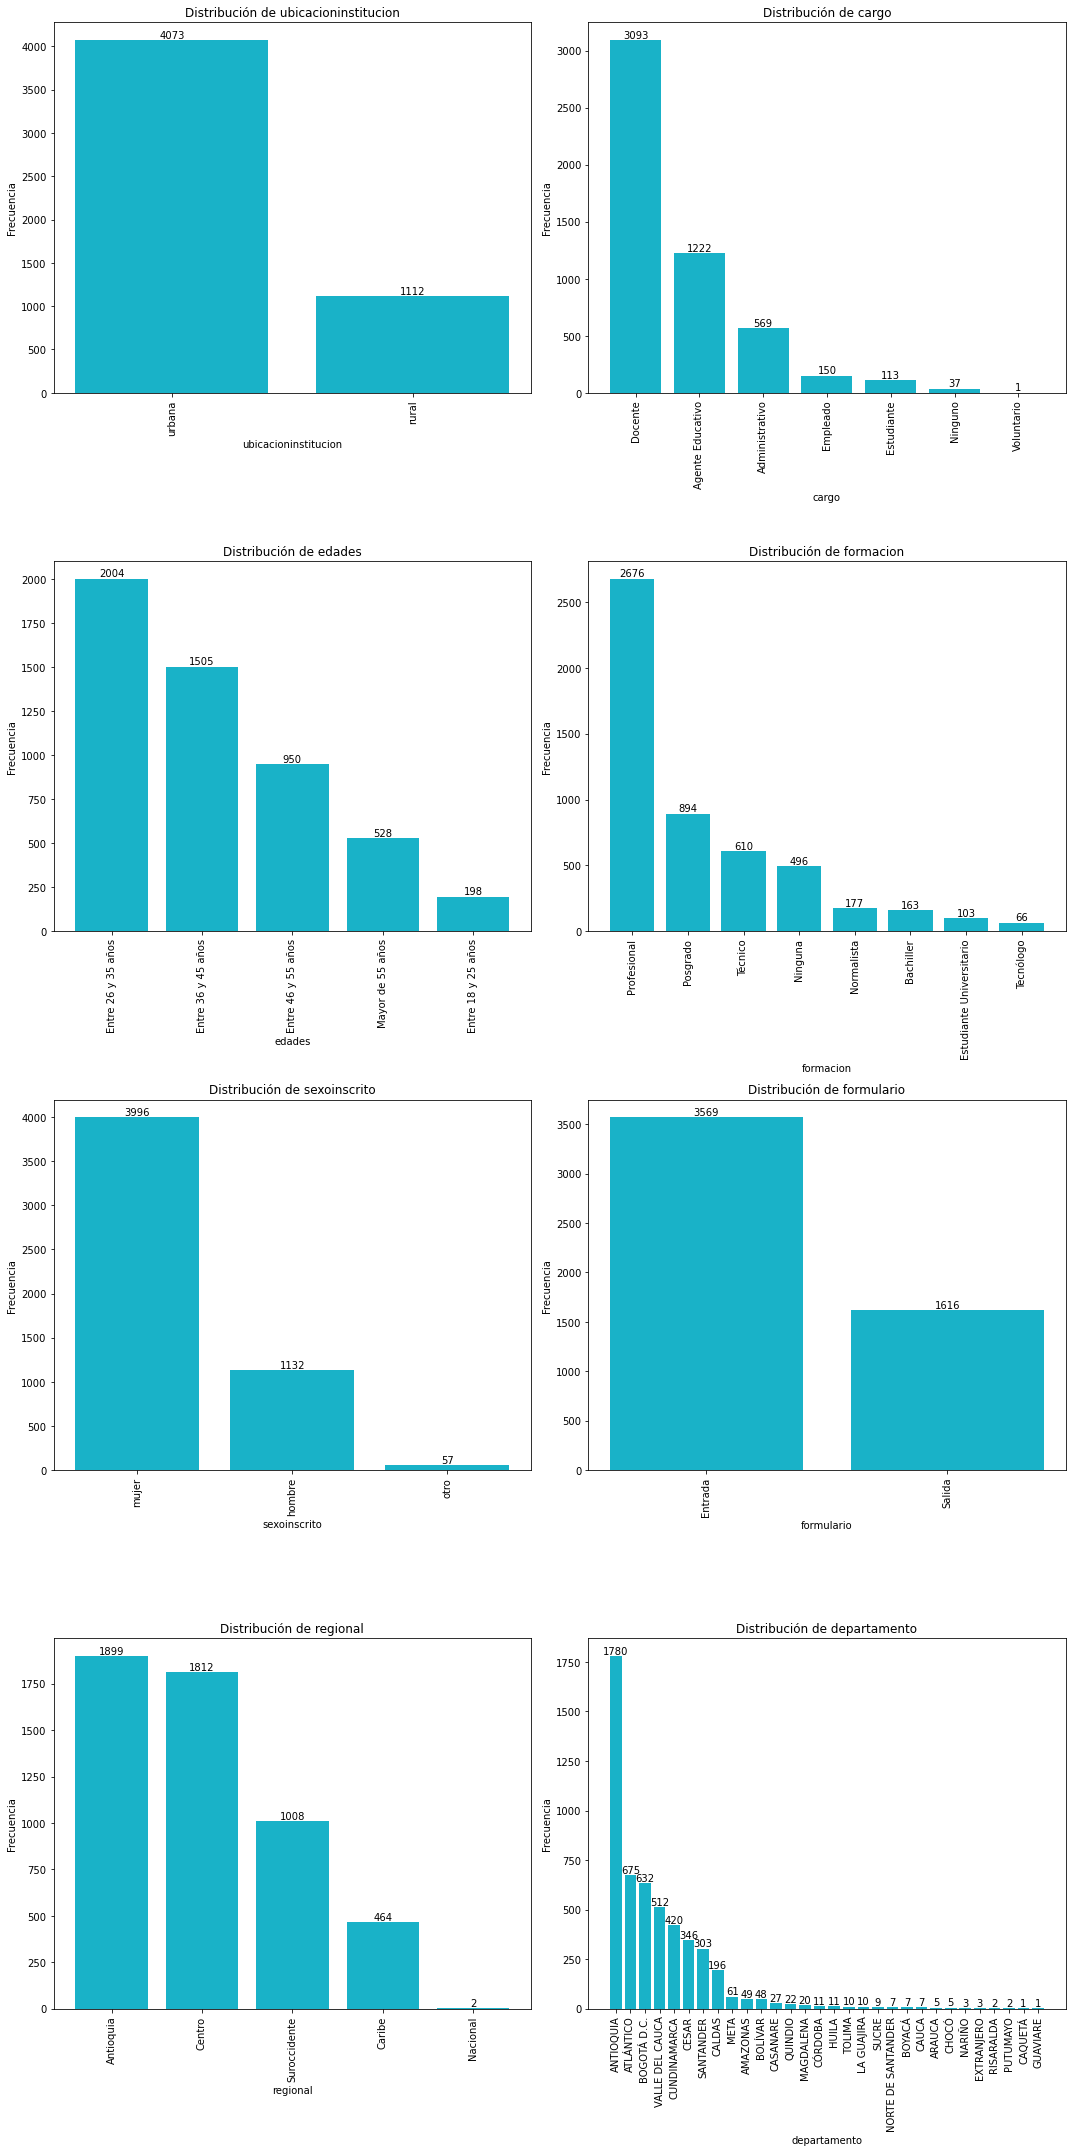

In [69]:
# Variables categóricas
categorical_variables = [
    "ubicacioninstitucion",
    "cargo",
    "edades",
    "formacion",
    "sexoinscrito",
    "formulario",
    "regional",
    "departamento",
]

# Configura un diseño de cuadrícula para mostrar múltiples gráficos
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 30)) #3 filas 3 columnas
plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Espaciado entre los gráficos

# Itera a través de las variables categóricas y crea gráficos de barras
for i, variable in enumerate(categorical_variables):
    row, col = i // 2, i % 2  # Calcula la fila y columna actual
    ax = axes[row, col]  # Obtén el eje actual

    # Cuenta las ocurrencias de cada categoría y crea un gráfico de barras
    counts = data_imputado[variable].value_counts()
    ax.bar(counts.index, counts.values, color="#19b2c8")
    ax.set_title(f"Distribución de {variable}")
    ax.set_xlabel(variable)
    ax.set_ylabel("Frecuencia")
    ax.tick_params(
        axis="x", rotation=90
    )  # Rotar etiquetas del eje x para mejorar la legibilidad

    # Agrega etiquetas de datos en las barras
    for j, v in enumerate(counts.values):
        ax.text(j, v, str(v), ha="center", va="bottom")


# Ajusta automáticamente los márgenes
plt.tight_layout()
plt.show()